# recreated from Hunter's poster figure notebook 

### The line graphs/ xtwins plots show the difference between ESM4 and CM4. This notebook goes through the steps I took to prepare and create some figures that evantually ended up on my poster. Check it out right outside the office. Check Williams out too!

i only recreated the line plots and xtwin plots. seasonal temperature plots are in the temp and wind speed notebook

In [90]:
##importing all the packages needed to run code.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import zarr
import gcsfs
from mpl_axes_aligner import align

ModuleNotFoundError: No module named 'mpl_axes_aligner'

In [49]:
##importing south polar projection.
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=45)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [50]:
##importing Eastward Near-Surface Wind data from google cloud. Amon ## CM4 data
df_uas = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_uas	
# step two … # replace with the id you need and other info to ween down datasets 
df_u = df_uas.query("source_id=='GFDL-CM4' & experiment_id == 'piControl' & variable_id == 'uas'& table_id == 'Amon'")
df_u
# step three 
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_u.zstore.values[-1]
mapper = gcs.get_mapper(zstore)
ds_uas = xr.open_zarr(mapper, consolidated=True)
ds_uas

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 6000)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Data variables:
    uas        (time, lat, lon) float32 dask.array<chunksize=(610, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    variable_id:            uas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-29;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/3d2d790f-efb9-47f0-819b-731eb48363cb...
    version_id:             v20180701

In [51]:
##importing Northward Near-Surface Wind data from google cloud. ## CM4 data
df_vas = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_vas	
# step two … # replace with the id you need and other info to ween down datasets 
df_v = df_vas.query("source_id=='GFDL-CM4' & experiment_id == 'piControl' & variable_id == 'vas'& table_id == 'Amon'")
df_v
# step three 
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_v.zstore.values[-1]
mapper = gcs.get_mapper(zstore)
ds_vas = xr.open_zarr(mapper, consolidated=True)
ds_vas

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 6000)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Data variables:
    vas        (time, lat, lon) float32 dask.array<chunksize=(596, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    variable_id:            vas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-09-29;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/6e2e071c-76e3-4784-b18a-142563814303...
    version_id:             v20180701

In [52]:
##importing temperature data from the google cloud. ## CM4 data
df_tas = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df_tas	
# step two … # replace with the id you need and other info to ween down datasets 
df_t = df_tas.query("source_id=='GFDL-CM4' & experiment_id == 'piControl' & variable_id == 'tas'& table_id == 'Amon'")
df_t
# step three 
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_t.zstore.values[-1]
mapper = gcs.get_mapper(zstore)
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 6000)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    variable_id:            tas
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-08-08;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/7ba3c844-8001-404b-b3df-7e5b680b4000...
    version_id:             v20180701

In [53]:
## Renaming all the data variables to 'easier' names
Tas_temp = ds.tas
Uas = ds_uas.uas
Vas = ds_vas.vas
Vas_winds = ds_vas.vas
Uas_winds = ds_uas.uas

In [54]:
## Merging Uas and Vas to create a wind speed.
mergewinds = xr.merge([Uas,Vas])
xmerge = mergewinds.lon
ymerge = mergewinds.lat
umerge = mergewinds.uas
vmerge = mergewinds.vas
## taking the umerge (uas variable) and vmerge(vas variable) to create speed by using speed formula.
speedmerge = np.sqrt(np.square(umerge) + np.square(vmerge))
## averaging the mergewinds data set over 500 years.
timeaveragemerge = mergewinds.sel(time=slice('0151-01-16','0650-12-16')).mean(dim='time')
timeaveragemerge


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 288)
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Data variables:
    uas      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
    vas      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>

In [55]:
## Slicing temperature to the south pole region.
Antslicetas = Tas_temp.sel(lat=slice(-89.5,-55))

In [56]:
## Taking south pole sliced region and grouping it into seasons. (DJF, MAM, etc.)
tas_seasonal = Antslicetas.groupby('time.season').mean(dim='time')
tas_seasonal

<xarray.DataArray 'tas' (season: 4, lat: 35, lon: 288)>
dask.array<stack, shape=(4, 35, 288), dtype=float32, chunksize=(1, 35, 288), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -58.5 -57.5 -56.5 -55.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Near-Surface Air Temperature
    original_name:  tas
    standard_name:  air_temperature
    units:          K

In [57]:
tas_summer = tas_seasonal.sel(season='DJF') ##southern hemisphere has summer in december,jan,feb
tas_winter = tas_seasonal.sel(season='JJA') ### winter months in southern hemisphere
tas_spring = tas_seasonal.sel(season='SON') ## spring months in southern hemisphere
tas_fall = tas_seasonal.sel(season='MAM') ## fall months in southern hemisphere

In [58]:
## slicing the Vas into my Cape Denison area. Hopefully yall can find a better way to represent it.
rossslicevas = Vas_winds.sel(lat=slice(-79.5,-65)).sel(lon=slice(130,180))
rossslicevas

<xarray.DataArray 'vas' (time: 6000, lat: 15, lon: 40)>
dask.array<getitem, shape=(6000, 15, 40), dtype=float32, chunksize=(596, 15, 40), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 ... -68.5 -67.5 -66.5 -65.5
  * lon      (lon) float64 130.6 131.9 133.1 134.4 ... 175.6 176.9 178.1 179.4
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Northward Near-Surface Wind
    original_name:  vas
    standard_name:  northward_wind
    units:          m s-1

In [59]:
## grouping the Vas slice of Cape Denison into seasons.
vas_ross_seasonal = rossslicevas.groupby('time.season').mean(dim='time')
vas_ross_seasonal

<xarray.DataArray 'vas' (season: 4, lat: 15, lon: 40)>
dask.array<stack, shape=(4, 15, 40), dtype=float32, chunksize=(1, 15, 40), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 ... -68.5 -67.5 -66.5 -65.5
  * lon      (lon) float64 130.6 131.9 133.1 134.4 ... 175.6 176.9 178.1 179.4
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Northward Near-Surface Wind
    original_name:  vas
    standard_name:  northward_wind
    units:          m s-1

In [60]:
## Slicing Uas into South pole region
Antsliceuas = Uas_winds.sel(lat=slice(-89.5,-55))
## Slicing Vas into south pole region
antslicevas = Vas_winds.sel(lat=slice(-89.5,-55))
## grouping south pole VAS into seasons
vas_seasonal = antslicevas.groupby('time.season').mean(dim='time')
## grouping south pole UAS into season
uas_seasonal = Antsliceuas.groupby('time.season').mean(dim='time')

In [61]:
## merging both seasonal value to make a seasonal merge
## so the dataset is UAS and VAS merged by seasons instead of years.
seasonalmerge = xr.merge([uas_seasonal,vas_seasonal])
seasonalmerge

<xarray.Dataset>
Dimensions:  (lat: 35, lon: 288, season: 4)
Coordinates:
    height   float64 10.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -58.5 -57.5 -56.5 -55.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    uas      (season, lat, lon) float32 dask.array<chunksize=(1, 35, 288), meta=np.ndarray>
    vas      (season, lat, lon) float32 dask.array<chunksize=(1, 35, 288), meta=np.ndarray>
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Eastward Near-Surface Wind
    original_name:  uas
    standard_name:  eastward_wind
    units:          m s-1

In [62]:
vas_ross_summer = vas_ross_seasonal.sel(season='DJF') ##southern hemisphere has summer in december,jan,feb
vas_ross_winter = vas_ross_seasonal.sel(season='JJA') ### winter months in southern hemisphere
vas_ross_spring = vas_ross_seasonal.sel(season='SON') ## spring months in southern hemisphere
vas_ross_fall = vas_ross_seasonal.sel(season='MAM') ## fall months in southern hemisphere

In [63]:
## Slicing the VAS into  my Cape Denison region
rossslicevas = Vas_winds.sel(lat=slice(-79.5,-65)).sel(lon=slice(130,180))
rossslicevas

<xarray.DataArray 'vas' (time: 6000, lat: 15, lon: 40)>
dask.array<getitem, shape=(6000, 15, 40), dtype=float32, chunksize=(596, 15, 40), chunktype=numpy.ndarray>
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 ... -68.5 -67.5 -66.5 -65.5
  * lon      (lon) float64 130.6 131.9 133.1 134.4 ... 175.6 176.9 178.1 179.4
  * time     (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Northward Near-Surface Wind
    original_name:  vas
    standard_name:  northward_wind
    units:          m s-1

# Temp attempt for xtwins graph. What is xtwins?

In [64]:
## Making 12 months into name variables
months_12 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [65]:
## temperature for cape denison
rossslicetemp = Tas_temp.sel(lat=slice(-75.5,-65)).sel(lon=slice(130,170))
temp_ross_seasonal = rossslicetemp.groupby('time.season').mean(dim='time')
##
temp_ross_summer = temp_ross_seasonal.sel(season='DJF') ##southern hemisphere has summer in december,jan,feb
temp_ross_winter = temp_ross_seasonal.sel(season='JJA') ### winter months in southern hemisphere
temp_ross_spring = temp_ross_seasonal.sel(season='SON') ## spring months in southern hemisphere
temp_ross_fall = temp_ross_seasonal.sel(season='MAM') ## fall months in southern hemisphere

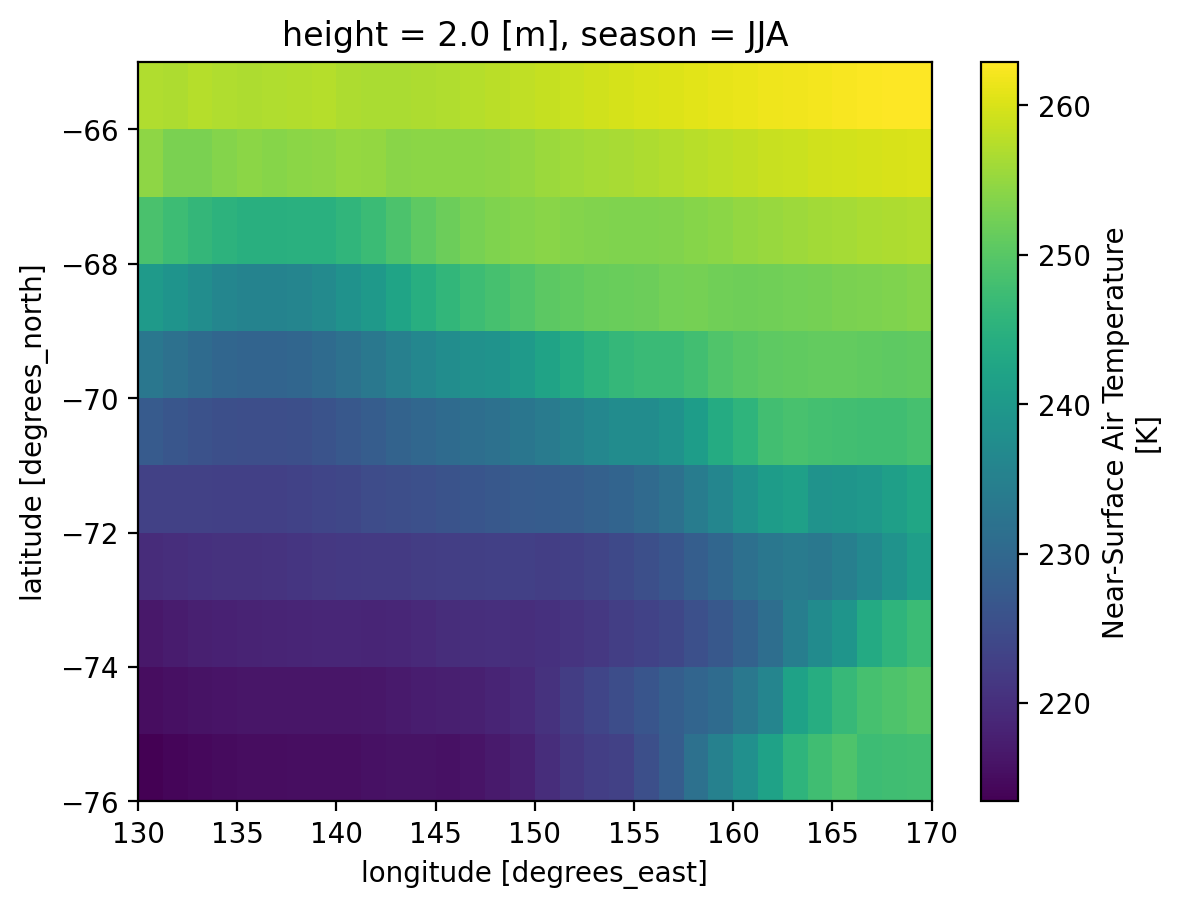

In [66]:
## seeing vmin/max
temp_ross_winter.plot()

Text(0.5, 1.0, 'Winter Temperature by Cape Denison ')

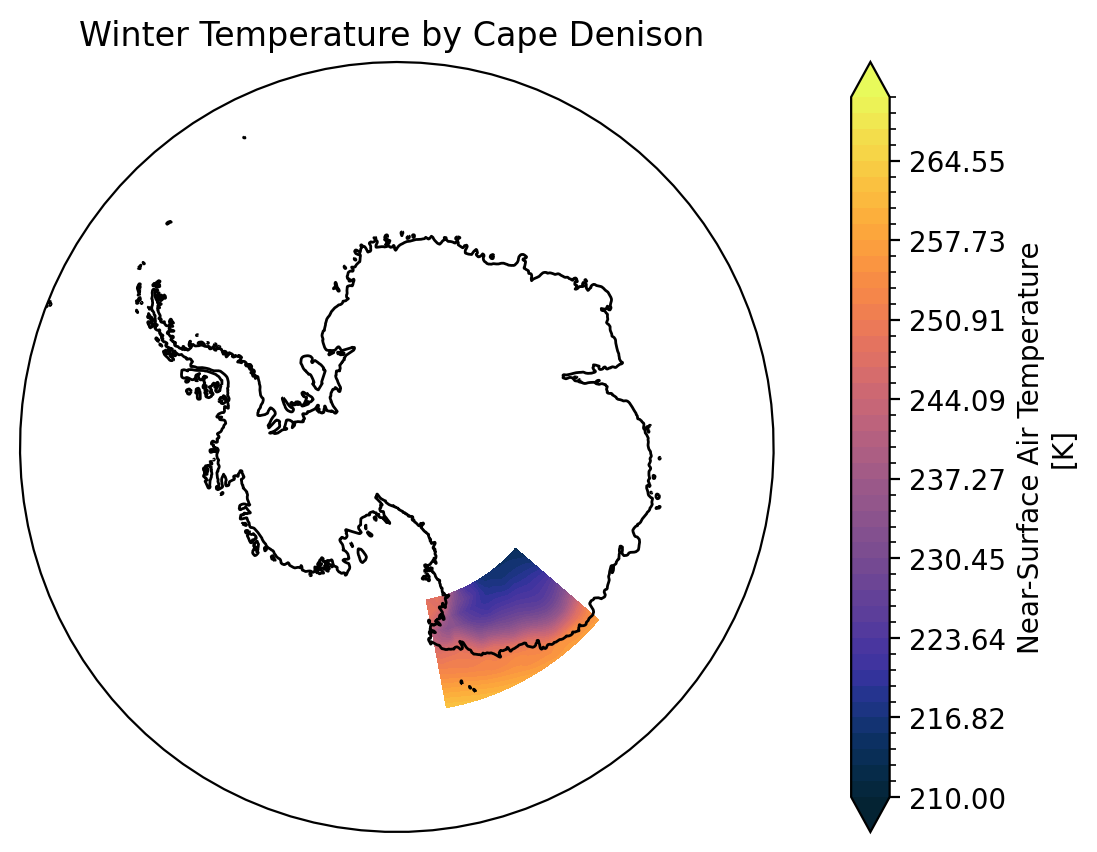

In [67]:
## plotting winter vmin/max
South_Polar(temp_ross_winter,210,270,cmap=cmocean.cm.thermal)
plt.title("Winter Temperature by Cape Denison ")

In [68]:
## temperature for south pole
spslicetemp = Tas_temp.sel(lat=slice(-89.5,-79)).sel(lon=slice(90,130))
temp_sp_seasonal = spslicetemp.groupby('time.season').mean(dim='time')
##
temp_sp_summer = temp_sp_seasonal.sel(season='DJF') ##southern hemisphere has summer in december,jan,feb
temp_sp_winter = temp_sp_seasonal.sel(season='JJA') ### winter months in southern hemisphere
temp_sp_spring = temp_sp_seasonal.sel(season='SON') ## spring months in southern hemisphere
temp_sp_fall = temp_sp_seasonal.sel(season='MAM')

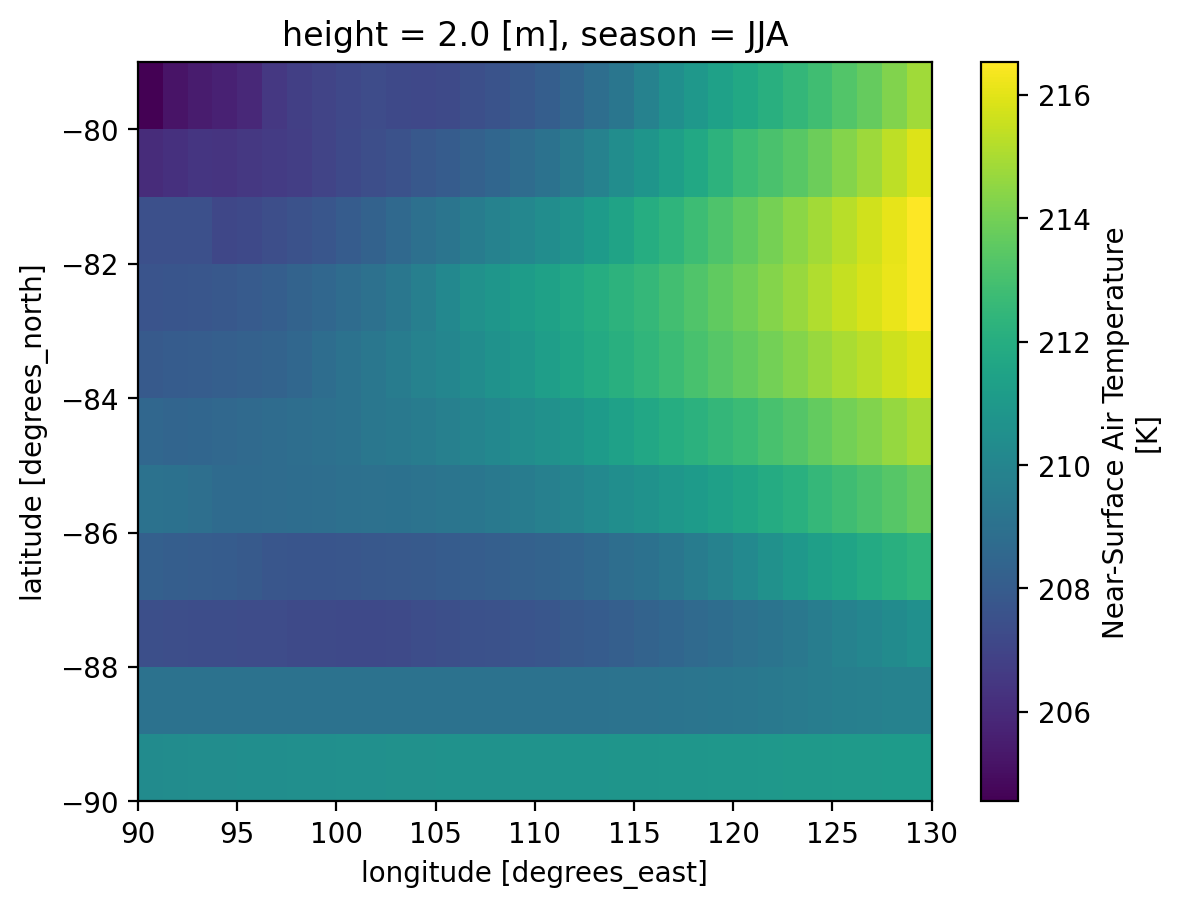

In [69]:
## seeing vmin/max
temp_sp_winter.plot()

Text(0.5, 1.0, 'Winter Temperature by South Pole')

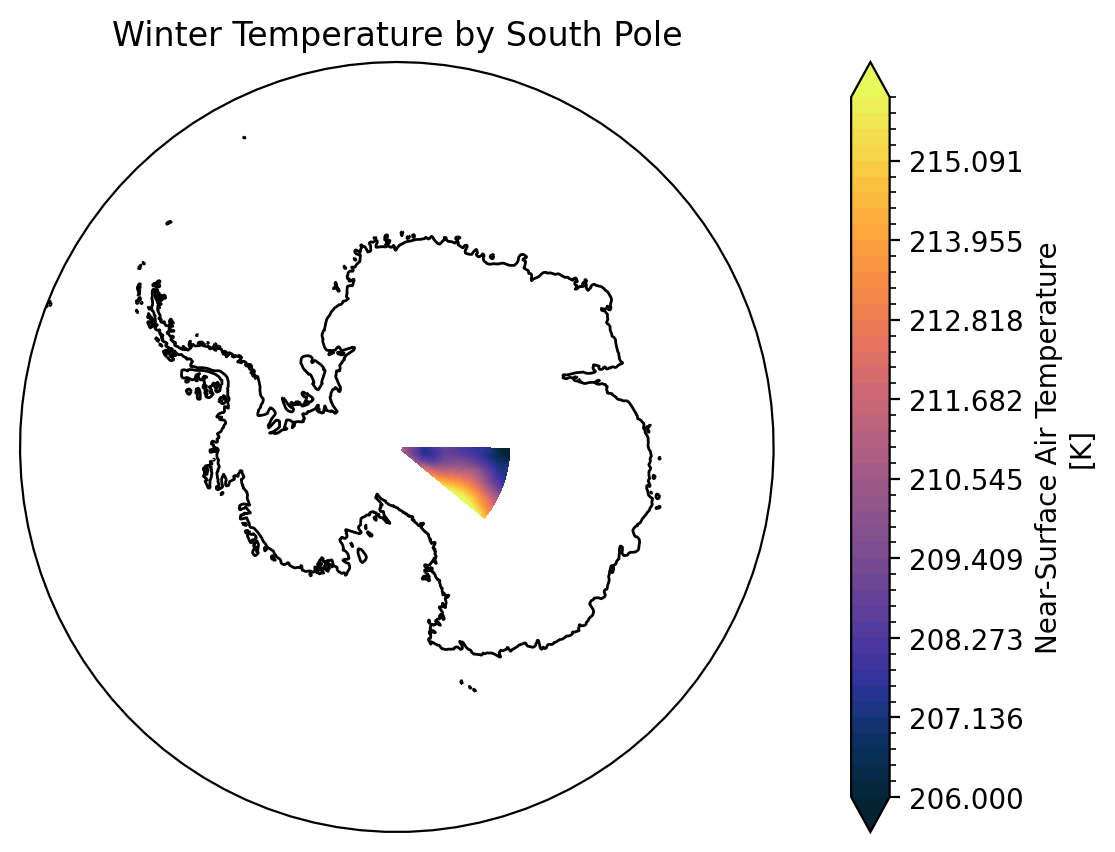

In [70]:
## plotting to see the region
South_Polar(temp_sp_winter,206,216,cmap=cmocean.cm.thermal)
plt.title("Winter Temperature by South Pole")

In [71]:
##rosstemp_graph = rossslicetemp.sum(dim=['lat','lon'])
##rosstemp_graph_mean = rosstemp_graph.sel(time=slice('0151-01-16', '0650-12-01')).groupby('time.month').mean(dim='time')
##rosstemp_graph_months = rosstemp_graph_mean.drop(labels='month').assign_coords({'month':months_12})
##### CODE ABOVE IS FROM CLIMATE MODELING CLASS THAT I USED AS A BASELINE
##slicing the region for my Cape Denison area and meadning the lat, lon
rosstemp_graph = rossslicetemp.sel(lat=slice(-75.5,-65)).sel(lon=slice(130,170)).mean(dim=['lat','lon'])
## Averaging and slicing the time. then grouping it by month
rosstemp_graph_mean = rosstemp_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
## dropping the month label from model and assigming my months_12 months
rosstemp_graph_months = rosstemp_graph_mean.drop(labels='month').assign_coords({'month':months_12})

In [72]:
## ##slicing the region for my South pole area and meadning the lat, lon
sptemp_graph = spslicetemp.sel(lat=slice(-89.5,-79)).sel(lon=slice(90,130)).mean(dim=['lat','lon'])
## ## Averaging and slicing the time. then grouping it by month
sptemp_graph_mean = sptemp_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
## ## dropping the month label from model and assigming my months_12 months
sptemp_graph_months = sptemp_graph_mean.drop(labels='month').assign_coords({'month':months_12})

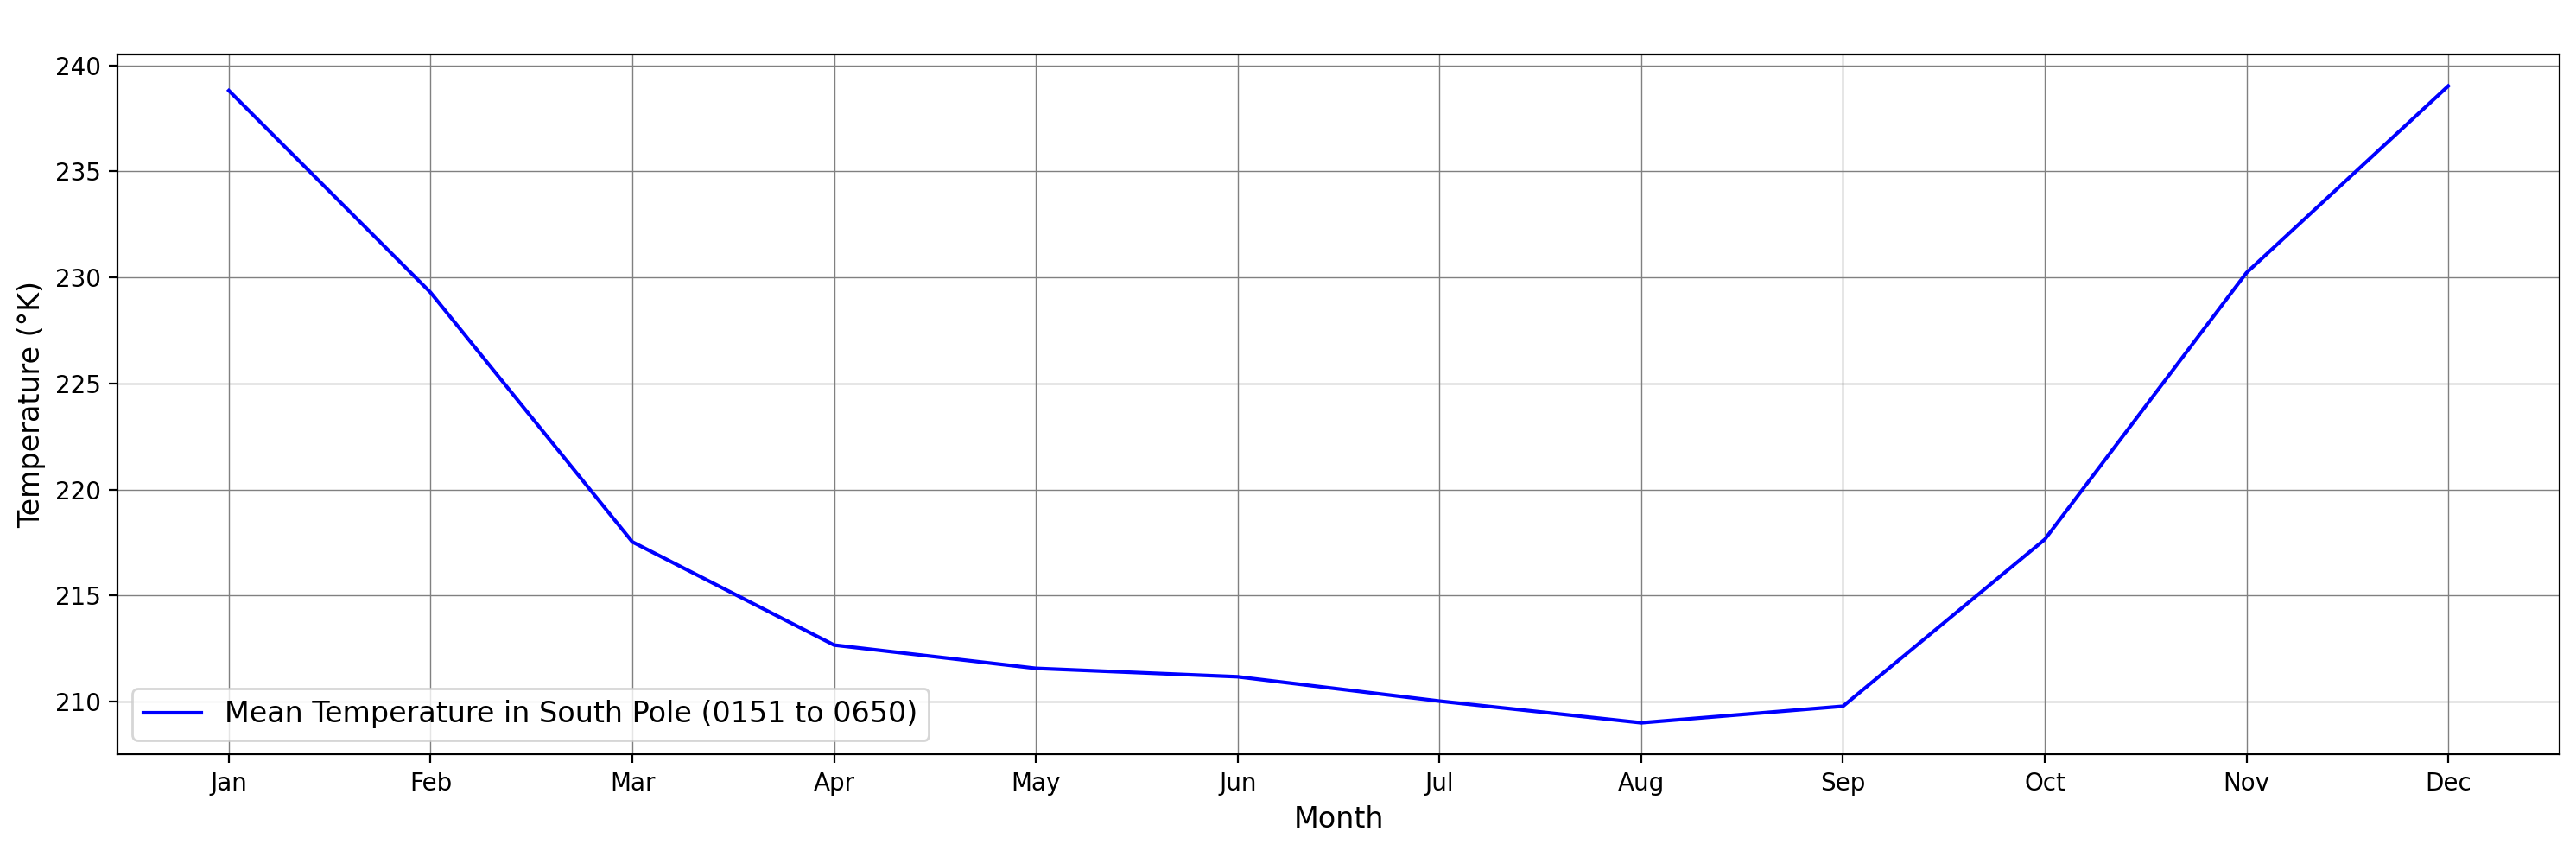

In [73]:
## plotting mean temp southpole cm4
fig, ax =plt.subplots(figsize=[15, 5])
sptemp_graph_months.plot(
    color = 'blue', # plotting
    linestyle = "-",
    label='Mean Temperature in South Pole (0151 to 0650)')
ax.legend(fontsize = 12) ## legend
ax.set_title( " ")
##ax.set_title( "Cape Denison/Mawson Wind speed") # title
ax.set_ylabel("Temperature (°K)",fontsize = 12) ## ylabel
## make everything look nice
ax.set_xlabel("Month", fontsize = 12) ## x-axis
plt.tight_layout()
plt.grid(which='major',axis ='y', linewidth='0.5', color='grey')
plt.grid(which='major',axis ='x', linewidth='0.5', color='grey')

# ESM data

In [74]:
## reading in google cloud data
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [75]:
#defines the Eastward Near-Surface Wind
gfdl_esm4_uas_data = google_cloud_cmip6.query(
    "table_id == 'Amon' & \
    variable_id == 'uas' & \
    experiment_id == 'piControl' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4'")

gcs = gcsfs.GCSFileSystem(token='anon')
zstore_esm4_uas = gfdl_esm4_uas_data.zstore.values[-1]
mapper_esm4_uas = gcs.get_mapper(zstore_esm4_uas)

esm4_uas = xr.open_zarr(mapper_esm4_uas, 
                                consolidated=True,use_cftime=True).uas.rename({'lat':'latitude',
                                                             'lon':'longitude'})

#defines the NorthWard Near-Surface Wind
gfdl_esm4_vas_data = google_cloud_cmip6.query(
    "table_id == 'Amon' & \
    variable_id == 'vas' & \
    experiment_id == 'piControl' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4'")

zstore_esm4_vas = gfdl_esm4_vas_data.zstore.values[-1]
mapper_esm4_vas = gcs.get_mapper(zstore_esm4_vas)

esm4_vas = xr.open_zarr(mapper_esm4_vas, 
                                consolidated=True,use_cftime=True).vas.rename({'lat':'latitude',
                                                             'lon':'longitude'})

#Creates Near-Surface Air Temperature variable (tas)
gfdl_esm4_tas_data = google_cloud_cmip6.query(
    "table_id == 'Amon' & \
    variable_id == 'tas' & \
    experiment_id == 'piControl' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4'")

zstore_esm4_tas = gfdl_esm4_tas_data.zstore.values[-1]
mapper_esm4_tas = gcs.get_mapper(zstore_esm4_tas)

esm4_tas = xr.open_zarr(mapper_esm4_tas, 
                                consolidated=True,use_cftime=True).tas.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [76]:
## naming uas esm4
uase4=esm4_uas#.sel(time=slice('0001-01-16','0500-01-16')).mean(dim='time')#.groupby('time.season').mean(dim='time')
##naming vas esm4
vase4 = esm4_vas#.sel(time=slice('0001-01-16','0500-01-16')).mean(dim='time')
## merging uas and vas esm4
mergedwindse4 = xr.merge([uase4,vase4])

In [77]:
## calculating wind speed for esm4
ws2=np.sqrt(np.square(uase4) + np.square(vase4)).sel(latitude=slice(-90,-55))
ws2
#wind speed around antarctica

<xarray.DataArray (time: 6000, latitude: 35, longitude: 288)>
dask.array<getitem, shape=(6000, 35, 288), dtype=float32, chunksize=(596, 35, 288), chunktype=numpy.ndarray>
Coordinates:
    height     float64 10.0
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... -57.5 -56.5 -55.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 0001-01-16 12:00:00 ... 0500-12-16 12:00:00

In [78]:
## Grouping UAS, VAS, and TAS into seasons and averaging over the 500 year period.
uas_seasonal=esm4_uas.sel(time=slice('0001-01-16','0500-01-16')).groupby('time.season').mean(dim='time')
vas_seasonal=esm4_vas.sel(time=slice('0001-01-16','0500-01-16')).groupby('time.season').mean(dim='time')
tas_seasonal=esm4_tas.sel(time=slice('0001-01-16','0500-01-16')).groupby('time.season').mean(dim='time')
## creating wind speed based on seasonal
ws_seasonal = np.sqrt(np.square(uas_seasonal) + np.square(vas_seasonal))

In [79]:
## temperature for cape denison esm4
rossslicetempe4 = esm4_tas.sel(latitude=slice(-75.5,-65)).sel(longitude=slice(130,170))
## grouping by season.
temp_ross_seasonale4 = rossslicetempe4.groupby('time.season').mean(dim='time')
## esm4
temp_ross_summere4 = temp_ross_seasonal.sel(season='DJF') ##southern hemisphere has summer in december,jan,feb
temp_ross_wintere4 = temp_ross_seasonal.sel(season='JJA') ### winter months in southern hemisphere
temp_ross_springe4 = temp_ross_seasonal.sel(season='SON') ## spring months in southern hemisphere
temp_ross_falle4 = temp_ross_seasonal.sel(season='MAM') ## fall months in southern hemisphere

In [80]:
## slicing esm4 cape denison
rosstemp_graphe4 = rossslicetempe4.sel(latitude=slice(-75.5,-65)).sel(longitude=slice(130,170)).mean(dim=['latitude','longitude'])
## grouping by month
rosstemp_graph_meane4 = rosstemp_graphe4.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
## assignming my month names to months
rosstemp_graph_monthse4 = rosstemp_graph_meane4.drop(labels='month').assign_coords({'month':months_12})

In [81]:
## slicing for my southpole
spslicetempe4 = esm4_tas.sel(latitude=slice(-89.5,-79)).sel(longitude=slice(90,130))
## slicing again
sptemp_graphe4 = spslicetempe4.sel(latitude=slice(-89.5,-79)).sel(longitude=slice(90,130)).mean(dim=['latitude','longitude'])
## slicing time and averaging. then grouping by month
sptemp_graph_meane4 = sptemp_graphe4.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
## assigning my months 
sptemp_graph_monthse4 = sptemp_graph_meane4.drop(labels='month').assign_coords({'month':months_12})

In [82]:
## taking temp gradient for CM4 sp - Cape denison
ESM4gradient = sptemp_graph_monthse4 - rosstemp_graph_monthse4
ESM4gradientr = rosstemp_graph_monthse4 - sptemp_graph_monthse4 
## taking temp gradient for ESM4 sp - Cape denison
CM4gradient = sptemp_graph_months - rosstemp_graph_months
CM4gradientr = rosstemp_graph_months - sptemp_graph_months 

# temp xtwin graph

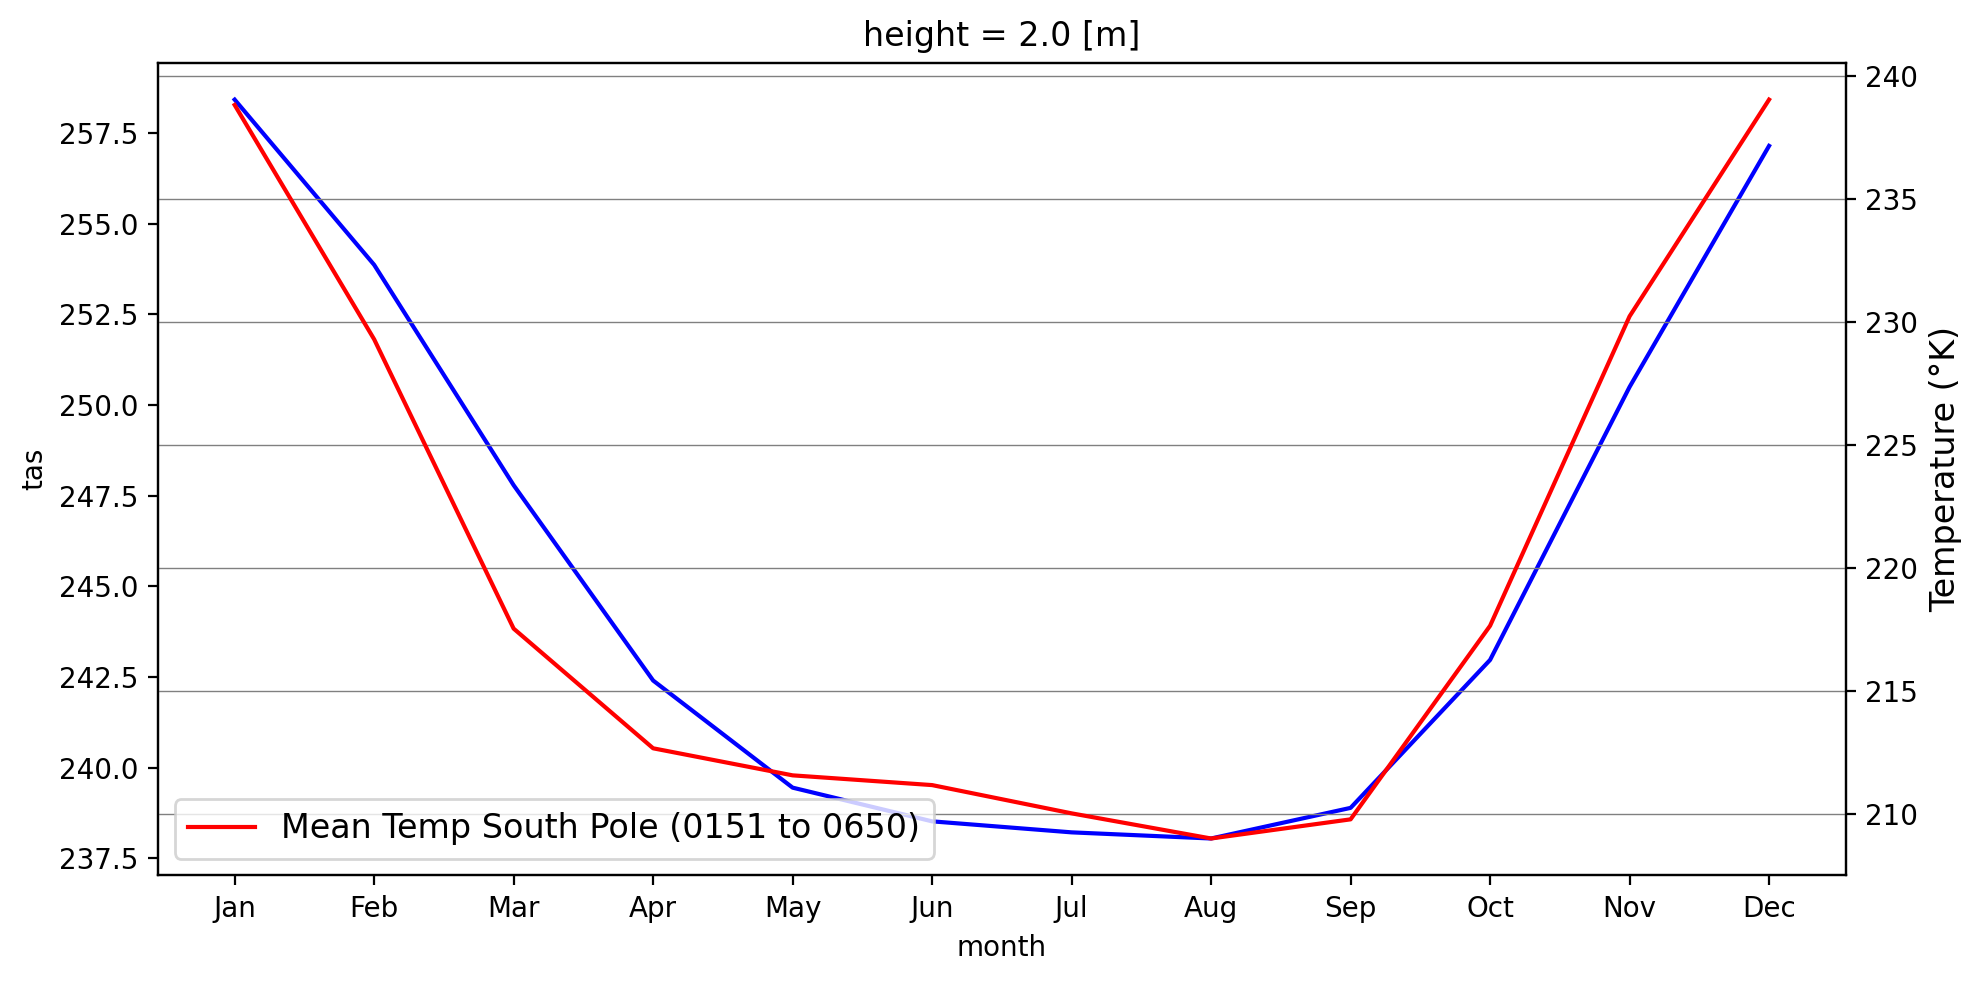

In [83]:
##plotting CM4 cape denison versus south pole
fig, ax =plt.subplots(figsize=[10, 5])
rosstemp_graph_months.plot(
    color = 'blue', # plotting
    linestyle = "-",
    label='Mean Temp Cape Denison (0151 to 0650)')
ax = ax.twinx()
ax.plot(sptemp_graph_months,
    color = 'red', # plotting
    linestyle = "-",
    label='Mean Temp South Pole (0151 to 0650)')

ax.legend(fontsize = 12)
#ax2.legend(fontsize = 12)## legend
ax.set_title( " ")
##ax.set_title( "Cape Denison/Mawson Wind speed") # title
ax.set_ylabel("Temperature (°K)",fontsize = 12)
#ax2.set_ylabel("Temperature (°K)",fontsize = 12)## ylabel
## make everything look nice
ax.set_xlabel("Month", fontsize = 12)
plt.tight_layout()
plt.grid(which='major',axis ='y', linewidth='0.5', color='grey')
plt.grid(which='major',axis ='x', linewidth='0.5', color='grey')

# function aligns separate y axes at the same origin (aligns 0 from each axis, despite having a different scale
org1 = 210.0  # Origin of first axis
org2 = 210.0
org3 = 210.0 # Origin of second axis
pos = 0.05  # Position the two origins are aligned (0 to 1: 0 being the bottom of the subplot, 1 being the top of the subplot)
#align.yaxes(ax, org1, ax2, org2, pos)

# Slicing speed from cm4 and esm4

In [84]:
##CM4 Slicing. Averaging
ross_speed_graph = speedmerge.sel(lat=slice(-79.5,-65)).sel(lon=slice(130,180)).mean(dim=['lat','lon'])
ross_speed_graph_mean = ross_speed_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
ross_speed_graph_months = ross_speed_graph_mean.drop(labels='month').assign_coords({'month':months_12})

In [85]:
##ESM4 wind speed slicing for Cape Denison
e4capespeed = ws2.sel(latitude=slice(-79.5,-65)).sel(longitude=slice(130,180)).mean(dim=['latitude','longitude'])
e4capespeed_mean = e4capespeed.sel(time=slice('0001-01-16','0500-01-16')).groupby('time.month').mean(dim='time')
e4capespeed_months = e4capespeed_mean.drop(labels='month').assign_coords({'month':months_12})

In [86]:
##CM4 South Pole wind speed slicing
sp_speed_graph = speedmerge.sel(lat=slice(-89.5,-79)).sel(lon=slice(90,130)).mean(dim=['lat','lon'])
sp_speed_graph_mean = sp_speed_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
sp_speed_graph_months = sp_speed_graph_mean.drop(labels='month').assign_coords({'month':months_12})

In [87]:
##ESM4 South pole wind speed slice
e4_sp_speed = ws2.sel(latitude=slice(-89.5,-79)).sel(longitude=slice(90,130)).mean(dim=['latitude','longitude'])
e4_sp_speed_mean = e4_sp_speed.sel(time=slice('0001-01-16','0500-01-16')).groupby('time.month').mean(dim='time')
e4_sp_speed_months = e4_sp_speed_mean.drop(labels='month').assign_coords({'month':months_12})

NameError: name 'align' is not defined

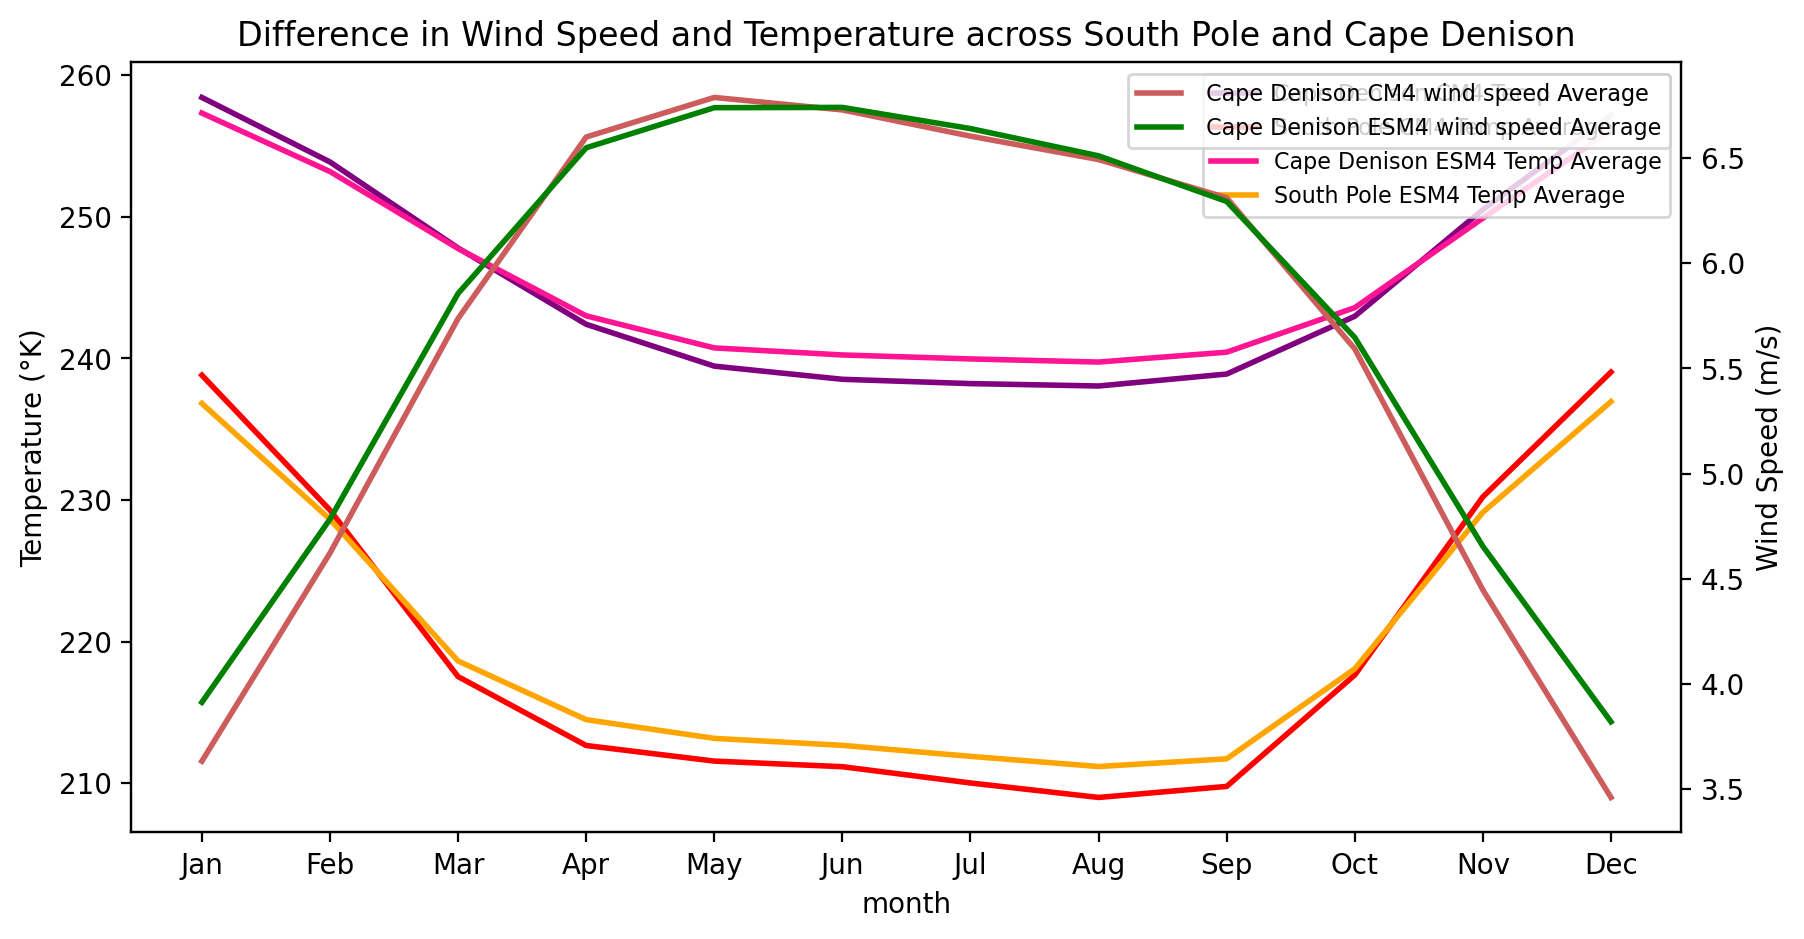

In [88]:
## plotting CM4 and ESm4
fig, ax =plt.subplots(figsize=[10, 5])
rosstemp_graph_months.plot( #plotting
    color = 'Purple',
    linewidth = 2,
    label='Cape Denison CM4 Temp Average')
sptemp_graph_months.plot(
    color = 'red',
    linewidth = 2,
    label='South Pole CM4 Temp Average')
rosstemp_graph_monthse4.plot(
    color = 'deeppink',
    linewidth = 2,
    label='Cape Denison ESM4 Temp Average')
sptemp_graph_monthse4.plot(
    color = 'Orange',
    linewidth = 2,
    label='South Pole ESM4 Temp Average')
ax2 = ax.twinx()
ax2.plot(ross_speed_graph_months, color = 'indianred',
    linewidth = 2,
    label=' Cape Denison CM4 wind speed Average')
ax2.plot(e4capespeed_months, color = 'green',
    linewidth = 2,
    label=' Cape Denison ESM4 wind speed Average')

ax.legend(fontsize = 8, loc = 1)
ax2.legend(fontsize = 8)
ax.set_ylabel('Temperature (°K)') ## ylabel
ax2.set_ylabel('Wind Speed (m/s)') ## y label
ax.set_title('Difference in Wind Speed and Temperature across South Pole and Cape Denison')
org1 = 210.0  # Origin of first axis
org2 = 0.0  # Origin of second axis
pos = 0.08  # Position the two origins are aligned (0 to 1: 0 being the bottom of the subplot, 1 being the top of the subplot)
align.yaxes(ax, org1, ax2, org2, pos)
plt.grid(which='major',axis ='y', linewidth='0.5', color='grey')

#month_2020.plot(label='2020 Ice',
               #color = 'yellow') ## plotting
#month_2021.plot(label='2021 Ice',
                      # color = 'cyan')

In [ ]:
## plotting the gradients to compare
fig, ax =plt.subplots()
CM4gradient.plot(
    color = 'forestgreen',
    linewidth = 2,
    label='CM4 Temp gradient')
ESM4gradient.plot(
    color = 'palegreen',
    linewidth = 2,
    label='ESM4 Temp gradient')
ax.legend(fontsize = 8, loc = 1)
ax.set_title('Temperature gradient between South Pole and Cape Denison (sp-cd)')

In [ ]:
## gradients flipped dont pay much attention
fig, ax =plt.subplots()
CM4gradientr.plot(
    color = 'forestgreen',
    linewidth = 2,
    label='CM4 Temp gradient')
ESM4gradientr.plot(
    color = 'palegreen',
    linewidth = 2,
    label='ESM4 Temp gradient')
ax.legend(fontsize = 8, loc = 1)
ax.set_title('Temperature gradient between South Pole and Cape Denison (cd - sp)')

In [ ]:
##Seaice_artic = Seaice_extent.sel(lat=slice(55,89.5)).sum(dim=['lat','lon']) ## slicing and summing
##Mean_seaice = Seaice_artic.sel(time=slice('1981-01-01', '2010-12-01')).groupby('time.month').mean(dim='time')
##mean_seaice_months = Mean_seaice.drop(labels='month').assign_coords({'month':months})
rossvas_graph = rossslicevas.sum(dim=['lat','lon'])
rossvas_graph_mean = rossvas_graph.sel(time=slice('0151-01-16', '0650-12-01')).groupby('time.month').mean(dim='time')
rossvas_graph_months = rossvas_graph_mean.drop(labels='month').assign_coords({'month':months_12})  
#rossvas_winter = vas_seasonal.sel(season='JJA').sel(lon=slice(130,180)) 
#rossvas_spring = vas_seasonal.sel(season='SON').sel(lon=slice(130,180)) 
#rossvas_fall = vas_seasonal.sel(season='MAM').sel(lon=slice(130,180))

In [ ]:
##rossvas_graph = rossslicevas.sum(dim=['lat','lon'])
##rossvas_graph_mean = rossvas_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
##rossvas_graph_months = rossvas_graph_mean.drop(labels='month').assign_coords({'month':months_12})
ross_speed_graph = speedmerge.sel(lat=slice(-79.5,-65)).sel(lon=slice(130,180)).mean(dim=['lat','lon'])
ross_speed_graph_mean = ross_speed_graph.sel(time=slice('0151-01-16', '0650-12-16')).groupby('time.month').mean(dim='time')
ross_speed_graph_months = ross_speed_graph_mean.drop(labels='month').assign_coords({'month':months_12})

In [ ]:
##Cape Denison wind speed slice
fig, ax =plt.subplots(figsize=[15, 5])
ross_speed_graph_months.plot(
    color = 'blue', # plotting
    linestyle = "-",
    label='Mean wind speed (0151 to 0650)')
ax.legend(fontsize = 12) ## legend
ax.set_title( " ")
##ax.set_title( "Cape Denison/Mawson Wind speed") # title
ax.set_ylabel("Wind Speed (m/s)",fontsize = 12) ## ylabel
## make everything look nice
ax.set_xlabel("Month", fontsize = 12)
## makes plot look good
plt.tight_layout()
## plots the grid lines
plt.grid(which='major',axis ='y', linewidth='0.5', color='grey')
plt.grid(which='major',axis ='x', linewidth='0.5', color='grey')

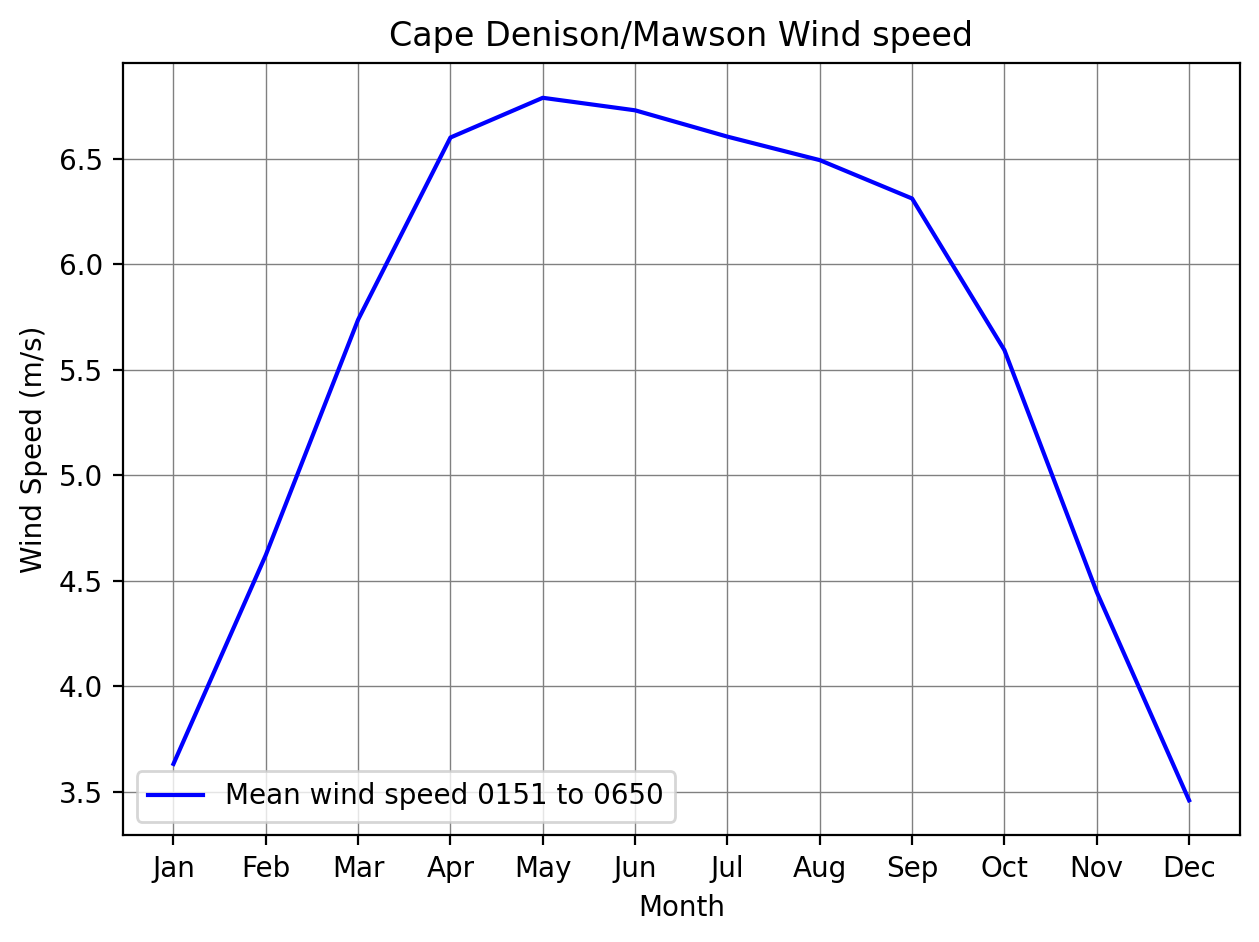

In [89]:
fig, ax =plt.subplots()
ross_speed_graph_months.plot(
    color = 'blue', # plotting
    linestyle = "-",
    label='Mean wind speed 0151 to 0650')
ax.legend() ## legend
ax.set_title( "Cape Denison/Mawson Wind speed") # title
ax.set_ylabel("Wind Speed (m/s)") ## ylabel
## make everything look nice
ax.set_xlabel("Month")
## makes plots look good
plt.tight_layout()
## grid lines
plt.grid(which='major',axis ='y', linewidth='0.5', color='grey')
plt.grid(which='major',axis ='x', linewidth='0.5', color='grey')